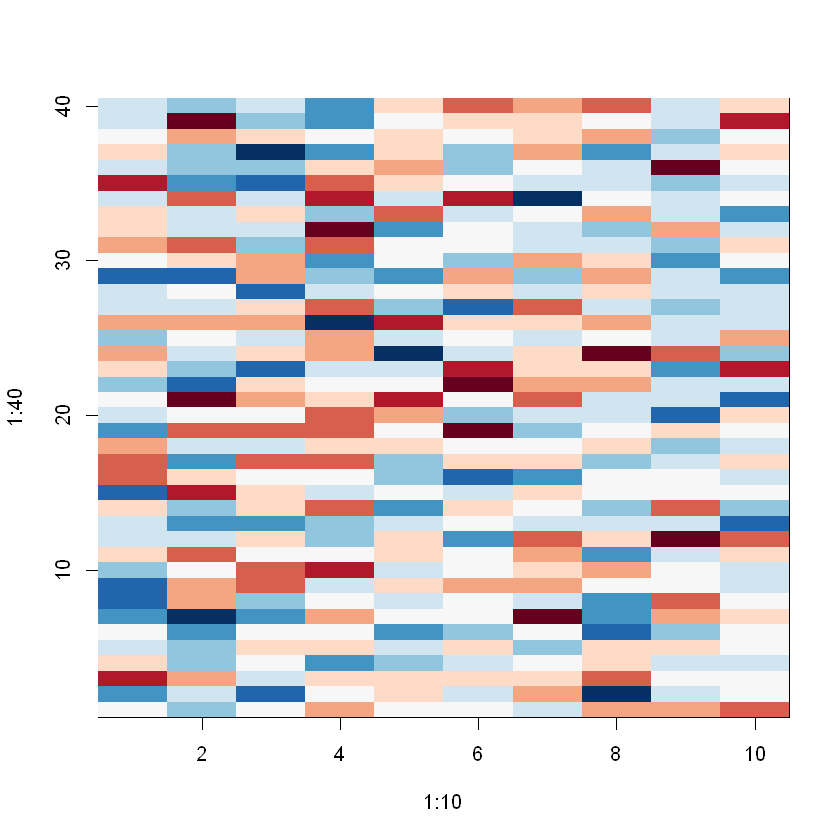

In [2]:
library(RColorBrewer)

# Simulate a 40 row, 10 column matrix
# t()) is the transpose function

set.seed(12345)
dataMatrix <- matrix(rnorm(400),nrow = 40)

# make more interesting colors

palette = brewer.pal(11,'RdBu')
# large negative numbers Red
# Large positive numbers Blue

#palette = c(brewer.pal(10,"OrRd"),brewer.pal(10,"PuBu")[10:1])
# now colors near the middle (mean =0) are darker

image(1:10, 1:40, t(dataMatrix)[,40:1], col = palette)
#[] this part reverses the row order, image().
# I guess we did this because image() does not support "40:1" for a label


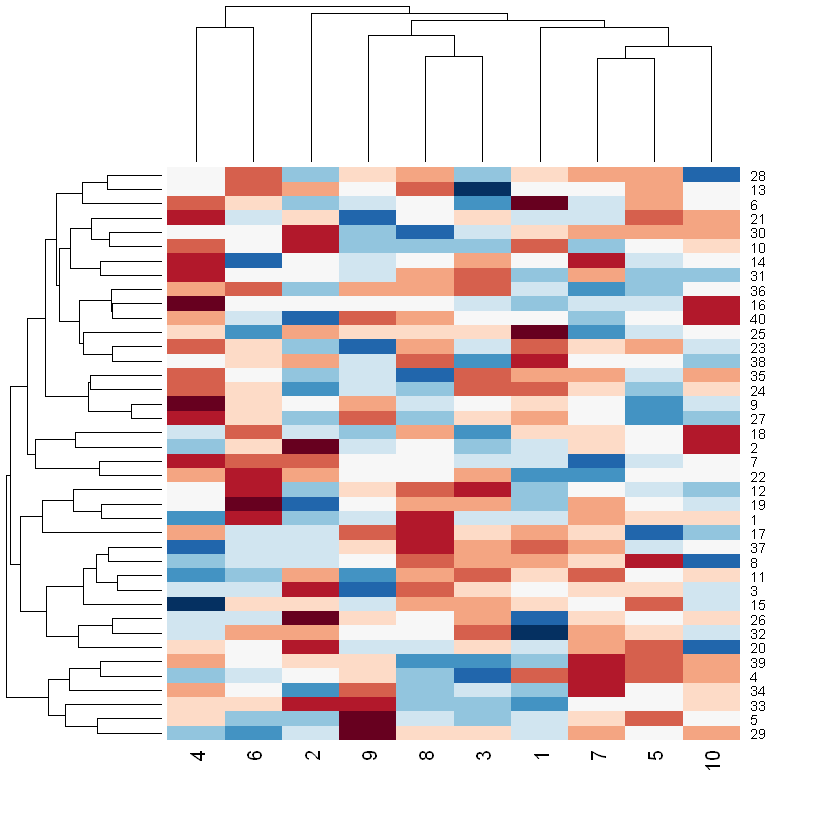

In [3]:
heatmap(dataMatrix, col = palette)

In [4]:
# Now fake data with a pattern

set.seed(678910)
for (i in 1:40) {
    coinFlip <- rbinom(1, size =1, prob = 0.5)

    ## If coin is heads, add a 0,0,0,0,0,5,5,5,5,5 to that row
    if (coinFlip) {
        dataMatrix[i, ] <- dataMatrix[i, ] + rep(c(0,3), each = 5)
    }
}


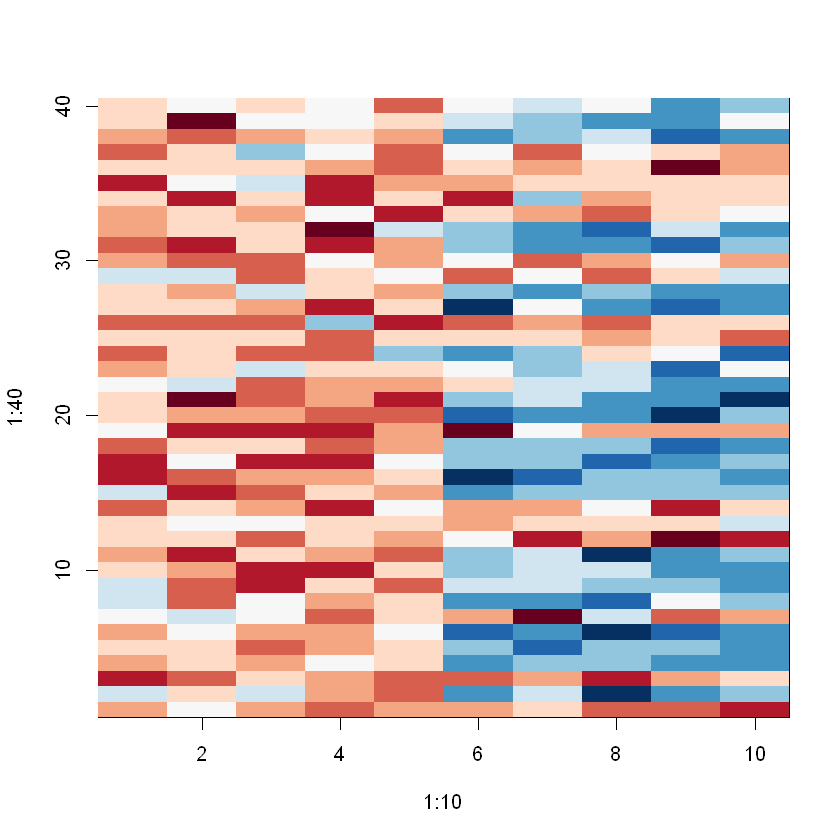

In [5]:
image(1:10, 1:40, t(dataMatrix)[,40:1], col = palette)

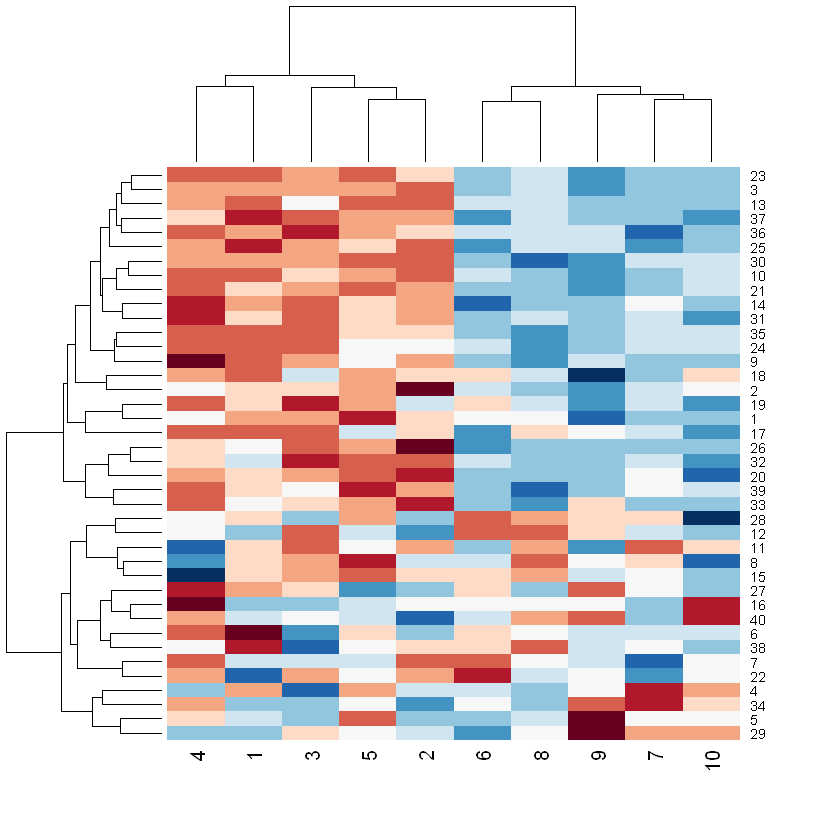

In [6]:
heatmap(dataMatrix, col = palette)

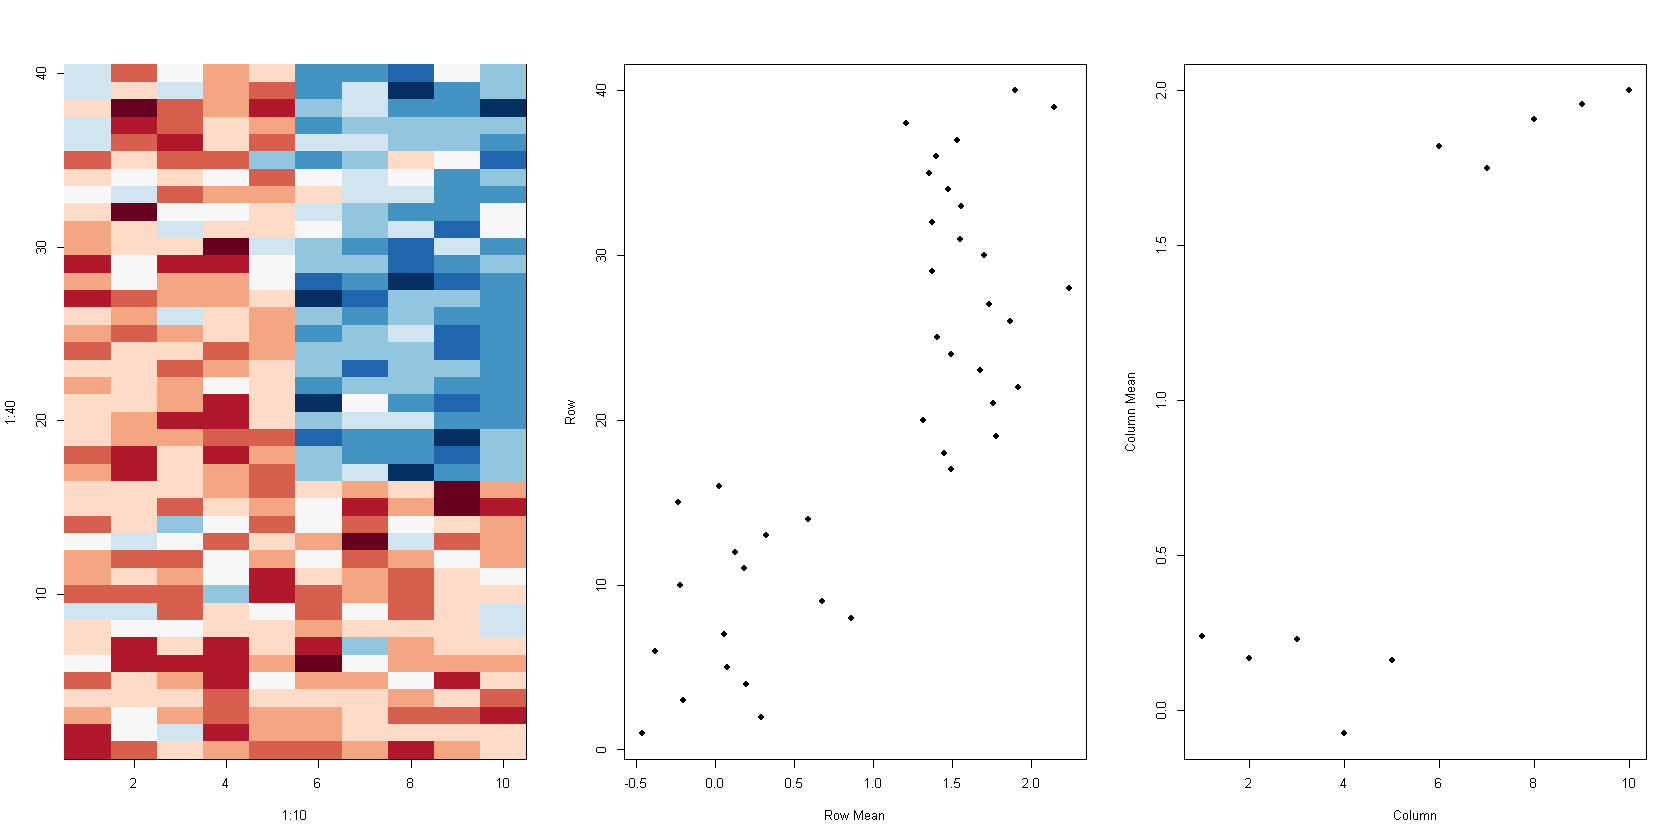

In [7]:
# Sort rows by their cluster order

hh <- hclust(dist(dataMatrix))
dataMatrixOrdered <- dataMatrix[hh$order, ]

# plot the ordered matrix, then sow row and column means
options(repr.plot.width=14)
par(mfrow = c(1,3))

image(1:10, 1:40, t(dataMatrixOrdered)[,40:1], col = palette)
## Row means
plot(rowMeans(dataMatrixOrdered), 40:1, , xlab = "Row Mean", ylab = "Row", pch=19)
## Column Means
plot(colMeans(dataMatrixOrdered), xlab = "Column", ylab = "Column Mean", pch=19)


# Singular Value Decomposition

[1] 34.725015  8.663655  8.088047  7.486278  7.048150  6.755452  5.289646
 [8]  4.905427  3.662853  3.381522

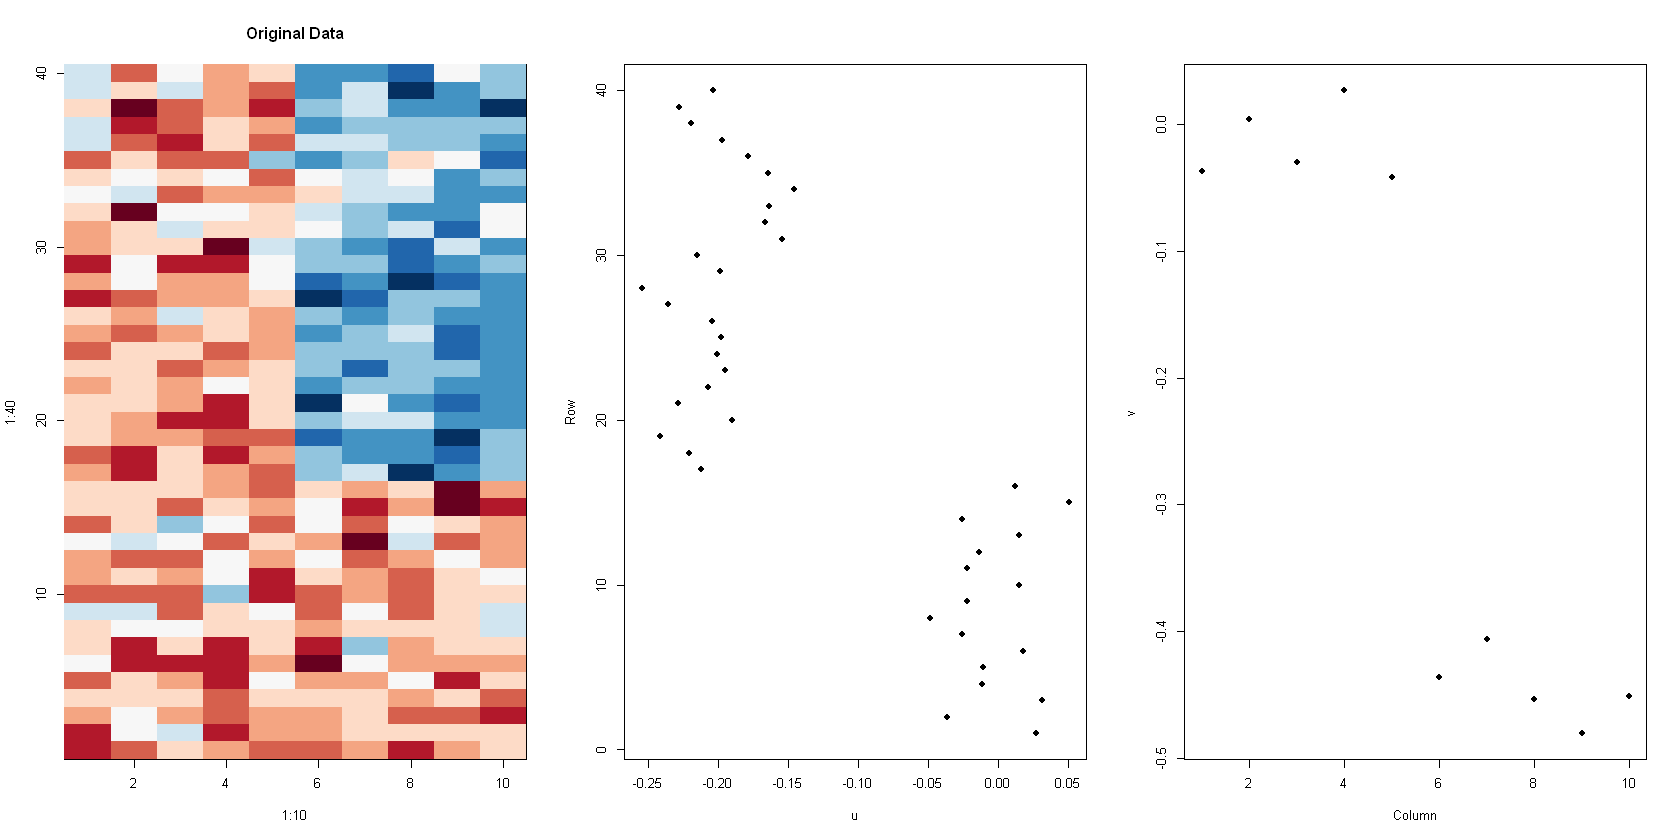

In [13]:
#svd1 <- svd(scale(dataMatrixOrdered))
svd1 <- svd(dataMatrixOrdered)

# scale() scales the columns of the matrix
# (by sutracting the each mean and dividing by each standard deviation)

# svd decomposes X = UDV'
# D = diagonal matrix, but actually it just stores it as a vector

# plot the ordered matrix, then sow row and column means
options(repr.plot.width=14)
par(mfrow = c(1,3))

image(1:10, 1:40, t(dataMatrixOrdered)[,40:1], col = palette, main="Original Data")
## Row means
plot(svd1$u[, 1], 40:1, , xlab = "u", ylab = "Row", pch=19)
## Column Means
plot(svd1$v[, 1], xlab = "Column", ylab = "v", pch=19)
svd1$d


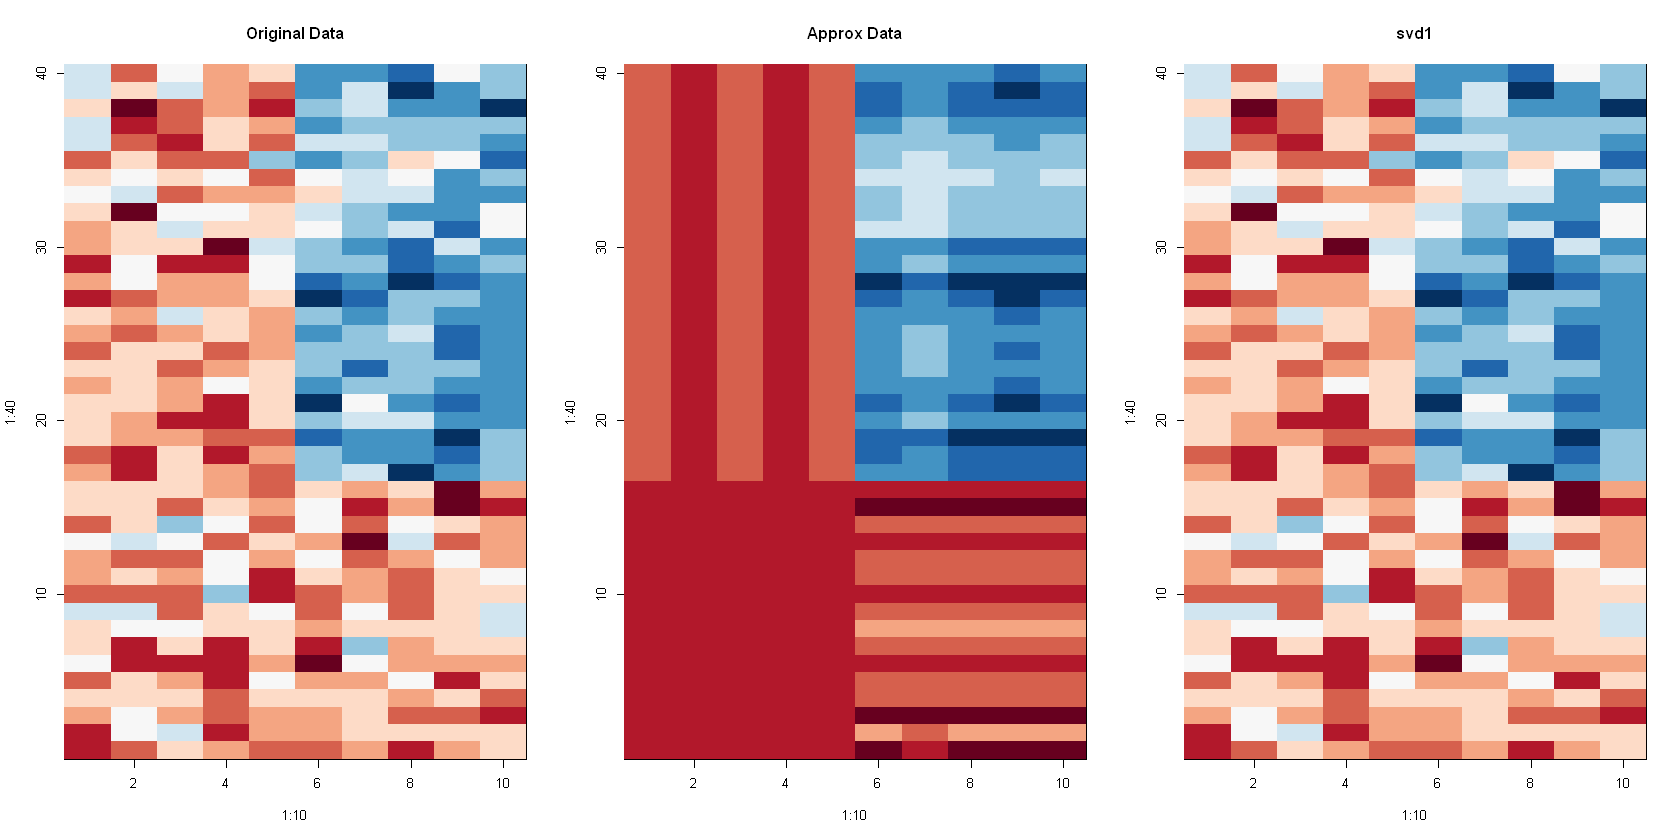

In [14]:
# Compare "Compressed" information to Original

approx <- with(svd1, outer(u[, 1], v[, 1]))

# reconstruct x
D <- diag(svd1$d)
X <- svd1$u %*% D %*% t(svd1$v) #  X = U D V'
# X would be exactly the same is we did not use the scale() function to create svd1

# plot the ordered matrix, then sow row and column means
options(repr.plot.width=14)
par(mfrow = c(1,3))

image(1:10, 1:40, t(dataMatrixOrdered)[,40:1], col = palette, main="Original Data")
image(1:10, 1:40, t(approx)[,40:1], col = palette, main="Approx Data")
image(1:10, 1:40, t(X)[,40:1], col = palette, main="svd1")
## Row means


# Components of the SVD - Variance explained

[1] 14.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[1] -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2
[16] -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2
[31] -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2

[1]  0.0  0.0  0.0  0.0  0.0 -0.4 -0.4 -0.4 -0.4 -0.4

0,0,0,0,0,1,1,1,1,1
0,0,0,0,0,1,1,1,1,1
0,0,0,0,0,1,1,1,1,1
0,0,0,0,0,1,1,1,1,1
0,0,0,0,0,1,1,1,1,1
0,0,0,0,0,1,1,1,1,1
0,0,0,0,0,1,1,1,1,1
0,0,0,0,0,1,1,1,1,1
0,0,0,0,0,1,1,1,1,1
0,0,0,0,0,1,1,1,1,1
0,0,0,0,0,1,1,1,1,1


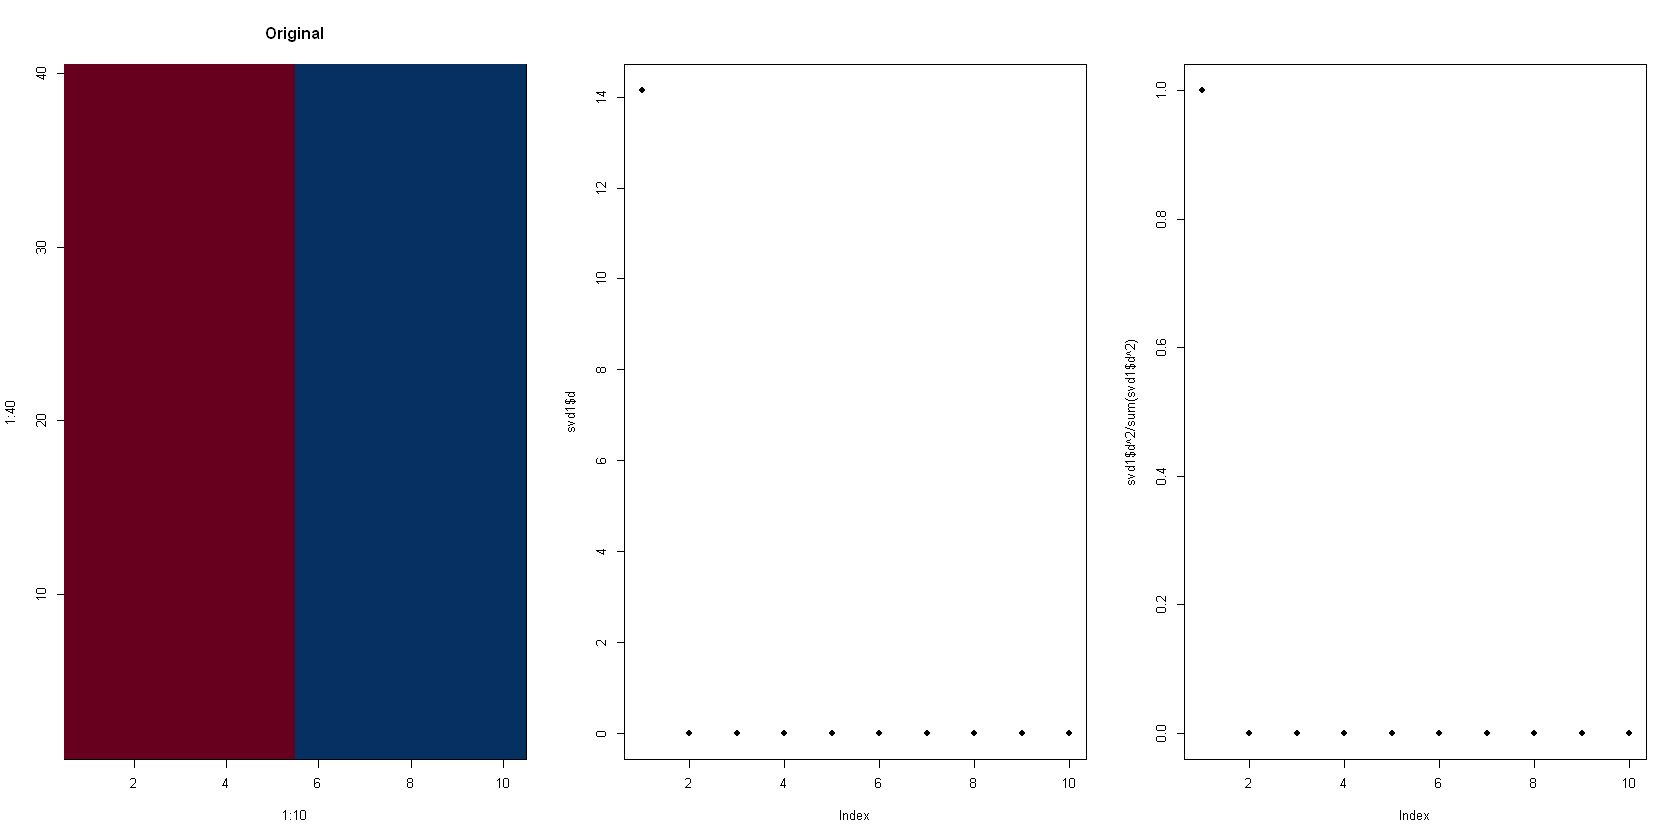

In [36]:
# new example data, five 0s then five 1s in each row

dataMatrix <- matrix(rep( rep(c(0 ,1), each = 5), each = 40), nrow = 40)

svd1 <- svd(dataMatrix)

options(repr.plot.width=14)
par(mfrow = c(1,3))

image(1:10, 1:40, t(dataMatrix)[,40:1], col = palette, main="Original")
# plot d vector
plot(svd1$d, pch = 19)
#variance
plot(svd1$d^2 / sum(svd1$d^2), pch=19)


# show me the values in the d vector
round(svd1$d, digits = 1)
round(svd1$u[, 1], digits = 1)
round(svd1$v[ ,1], digits = 1)
# all the variance in this data is EXPLAINED by the first value in d

# reconstruct x
D <- diag(svd1$d)
round(svd1$u %*% D %*% t(svd1$v), digits = 1) #  X = U D V'

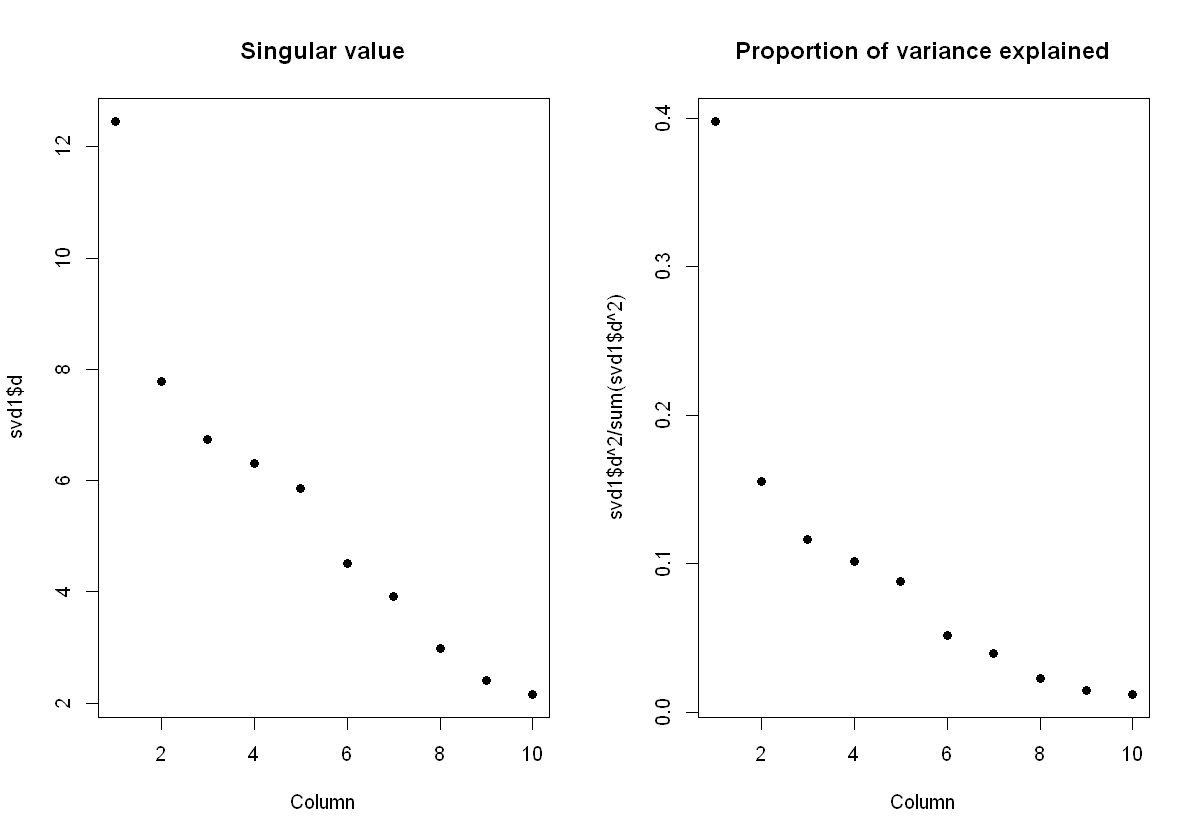

In [40]:
# back to prior example

options(repr.plot.width=10)
par(mfrow = c(1, 2))
svd1 <- svd(scale(dataMatrixOrdered))
plot(svd1$d, xlab = "Column", main = "Singular value", pch = 19)
plot(svd1$d^2/sum(svd1$d^2), xlab = "Column",
    main = "Proportion of variance explained",  pch = 19)

# Principal Components Analsys (PCA) vs. Singular Value Decomposition (SVD)

In [49]:
svd1 <- svd(dataMatrix)
pca1 <- prcomp(dataMatrix)

# right 'v' vector of SVD is same as rotation of PCA
round(svd1$v[, 1], digits = 2)
round(pca1$rotation[, 1], digits = 2)

[1]  0.00  0.00  0.00  0.00  0.00 -0.45 -0.45 -0.45 -0.45 -0.45

[1] 1 0 0 0 0 0 0 0 0 0

In [54]:
names(pca1)
pca1$x

[1] "sdev"     "rotation" "center"   "scale"    "x"

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0


# two patterns added to the data


In [ ]:

set.seed(12345)
dataMatrix <- matrix(rnorm(400),nrow = 40)

set.seed(678910)
for (i in 1:40) {
    coinFlip1 <- rbinom(1, size = 1, prob = 0.5)
    coinFlip2 <- rbinom(1, size = 1, prob = 0.5)
    if (coinFlip1) {
        ## Pattern 1
        dataMatrix[i, ] <- dataMatrix[i, ] + rep(c(0, 5), each = 5)
    }
    if (coinFlip2) {
        ## Pattern 2
        dataMatrix[i, ] <- dataMatrix[i, ] + rep(c(0, 5), 5)
    }
}
hh <- hclust(dist(dataMatrix))
dataMatrixOrdered <- dataMatrix[hh$order, ]

# plot
options(repr.plot.width=14)
par(mfrow = c(1, 3))
image(t(dataMatrixOrdered)[, nrow(dataMatrixOrdered):1], col = palette, main = "Data")
plot(rep(c(0, 1), each = 5), pch = 19, xlab = "Column", ylab = "Pattern 1",
    main = "Block pattern")
plot(rep(c(0, 1), 5), pch = 19, xlab = "Column", ylab = "Pattern 2",
    main = "Alternating pattern")

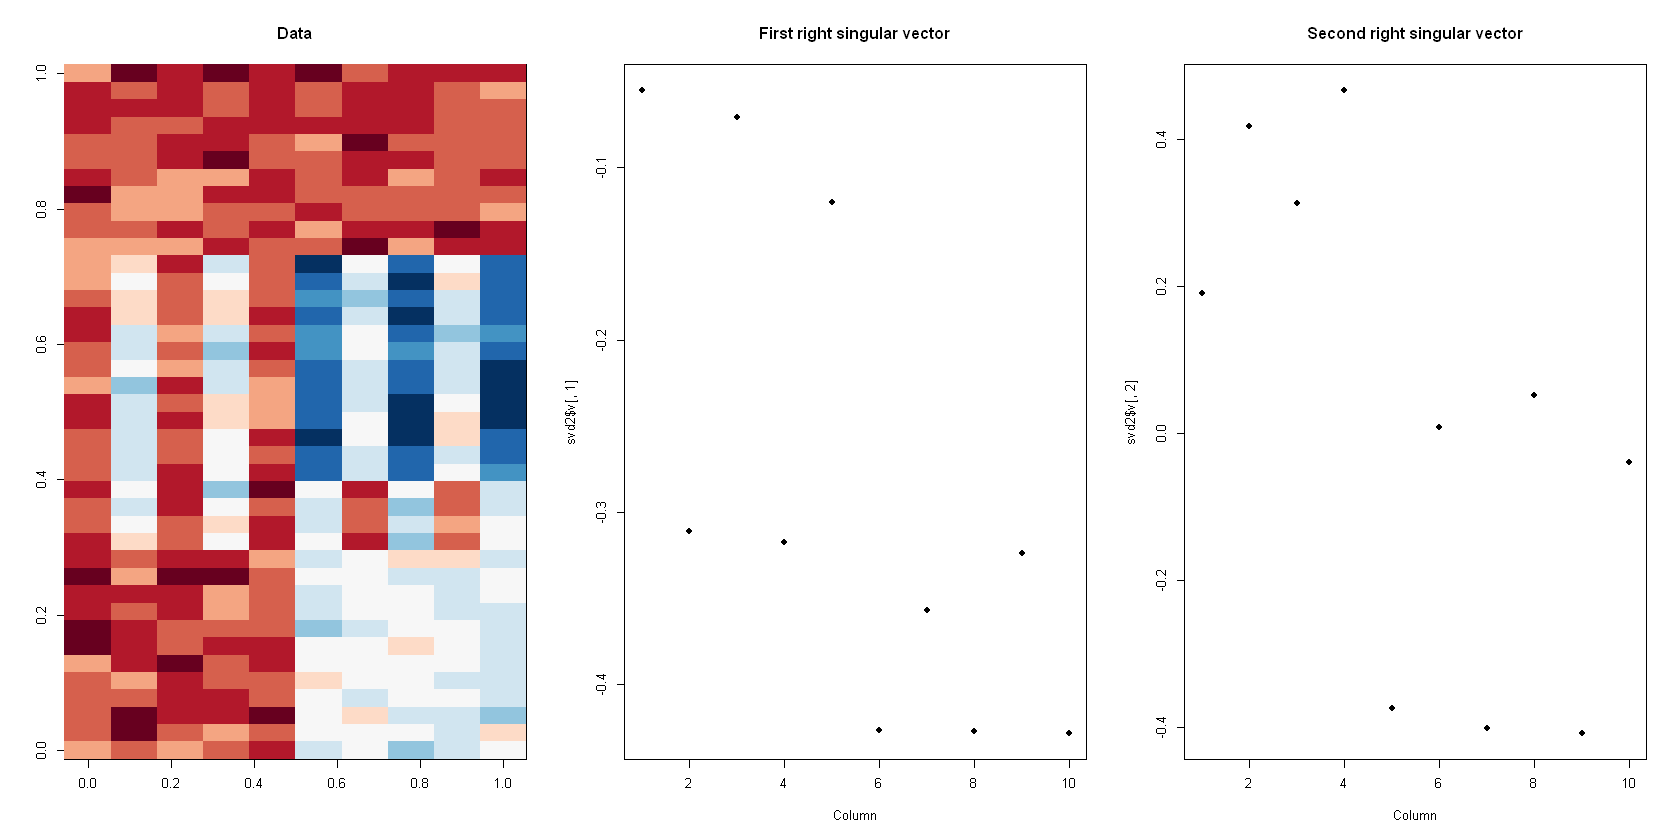

In [60]:
svd2 <- svd(scale(dataMatrixOrdered))
par(mfrow = c(1, 3))
image(t(dataMatrixOrdered)[, nrow(dataMatrixOrdered):1], col = palette, main = "Data")
plot(svd2$v[, 1], pch = 19, xlab = "Column", main = "First right singular vector")
plot(svd2$v[, 2], pch = 19, xlab = "Column", main = "Second right singular vector")

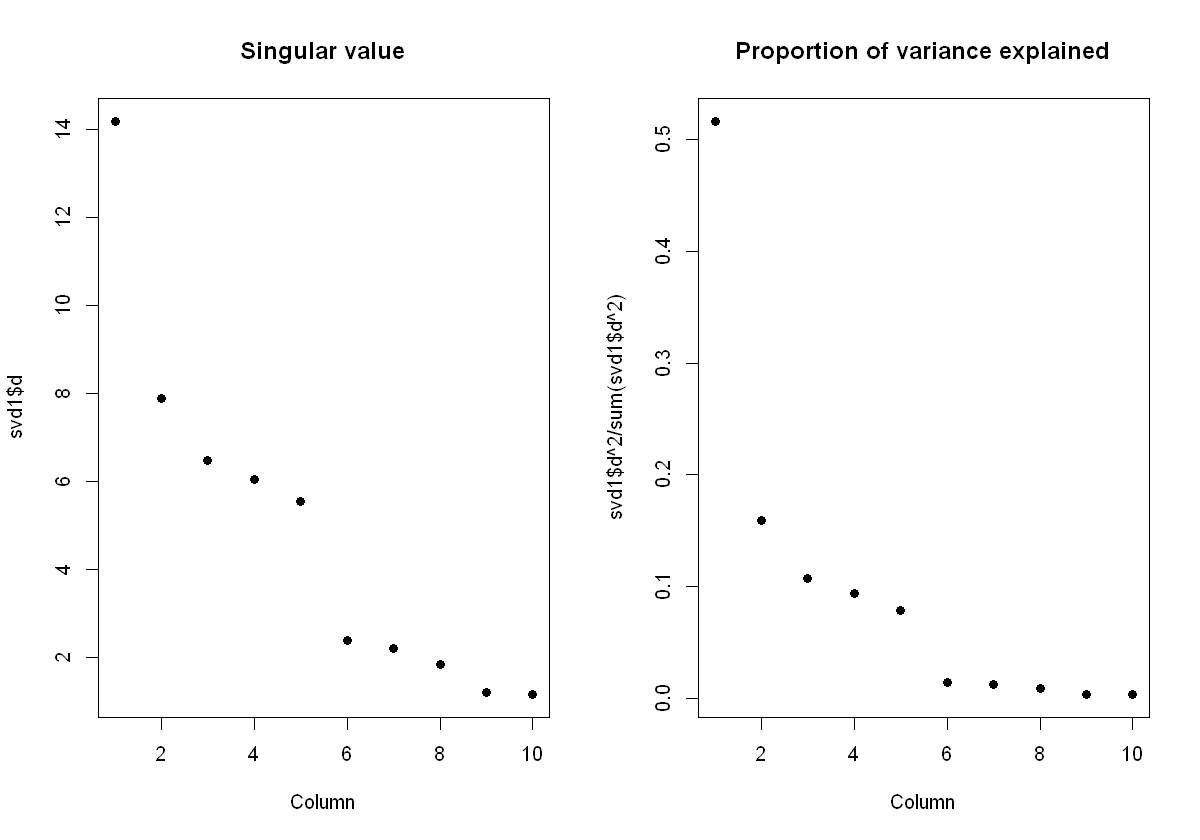

In [61]:
# Variation explained

options(repr.plot.width=10)
par(mfrow = c(1, 2))
svd1 <- svd(scale(dataMatrixOrdered))
plot(svd1$d, xlab = "Column", main = "Singular value", pch = 19)
plot(svd1$d^2/sum(svd1$d^2), xlab = "Column",
    main = "Proportion of variance explained",  pch = 19)